In [9]:
path = '../data/'
file = 'reviews_Video_Games_5.csv'
file_dataframe = 'reviews_Video_Games_5-data_frame.csv'
file_dataframe_over10 = 'reviews_Video_Games_5-over10-data_frame.csv'

# Testing RNN

In [2]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
import time

Using TensorFlow backend.


This is the first model used in the project

In [0]:
#rnn used in ml project
model = Sequential()
model.add(Dense(8, input_dim=100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 8)                 808       
_________________________________________________________________
dropout_33 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 18        
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


This is a test model made by me

In [4]:
model = Sequential() # istanza di Sequential 
model.add(Dense(128, input_dim=100, activation='relu',name="hidden1")) #strato di input + hidden
model.add(Dropout(0.5))
model.add(Dense(128, activation='sigmoid',name="hidden2"))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax',name="output")) #strato di output
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 128)               12928     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
hidden2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
output (Dense)               (None, 2)                 258       
Total params: 29,698
Trainable params: 29,698
Non-trainable params: 0
_________________________________________________________________


Optimizer used in SGD example in ML course

In [0]:
optimizer = keras.optimizers.SGD(lr=0.01, decay=0.1, momentum=0.975, nesterov=False)

# model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

Standard compile

In [5]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Random creation, do not use

In [0]:
#dati input di apprendimento composto da mille vettori di 20 float random
x_train = np.random.random((1000, 20))  #dati di out di apprendimento (train) composto da mille scalari random da 0 a 1 
y_train = np.random.randint(2, size=(1000, 1))   #dati input di validazione composto da 100 vettori di 20 float random 
x_test = np.random.random((100, 20))    #dati di out di validazione (test) composto da mille scalari random da 0 a 1 
y_test = np.random.randint(2, size=(100, 1))

Standard split

In [0]:
bankdata = pd.read_csv(path+file_dataframe)

# x = bankdata.drop('utility', axis=1).drop('text', axis=1)
# y = bankdata['utility']

dataset = bankdata.values
X = dataset[:,2:].astype(float)
Y = dataset[:,1]

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

Testing split

In [0]:
bankdata = pd.read_csv(path+file_dataframe)

bankdata = bankdata.drop('text',axis=1)
np_bankdata = np.asarray(bankdata,dtype=np.float32)

for i in range(2,101):
    minx = np.min( np_bankdata[:,i] )
    maxx = np.max( np_bankdata[:,i])
    np_bankdata[:,i] = (np_bankdata[:,i]-minx)/(maxx-minx)

train, test = train_test_split(np_bankdata)

x_train = train[0:,1:]
y_train = train[0:,:1]

x_test = test[0:,1:]
y_test = test[0:,:1]

Real split with label encoding

In [14]:
# load dataset
dataframe = pd.read_csv(path+file_dataframe)#, header=None)

dataset = dataframe.drop('text',axis=1)
np_dataset = np.asarray(dataset,dtype=np.float32)

train, test = train_test_split(np_dataset, test_size = 0.20)

# x_train = train[:,2:].astype(float)
# y_train = train[:,1]

# x_test = test[:,2:].astype(float)
# y_test = test[:,1]

x_train = train[0:,1:].astype(float)
y_train = train[0:,:1]

x_test = test[0:,1:].astype(float)
Y_test = test[0:,:1]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train)
#encoded_y_train = encoder.transform(y_train)
# convert integers to dummy variables (i.e. one hot encoded)
y_train = np_utils.to_categorical(y_train)
encoder.fit(Y_test)
#encoded_y_test = encoder.transform(Y_test)
# convert integers to dummy variables (i.e. one hot encoded)
y_test = np_utils.to_categorical(Y_test)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting, evaluation and metrics visualization

Elapsed time (learning): 00:00:51
Test loss: 0.5472659331430012
Test accuracy: 0.7252567089481404


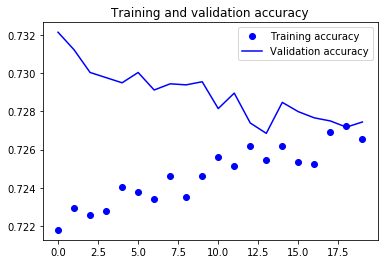

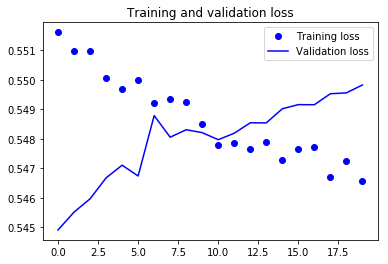

[[30085  2345]
 [10391  3535]]
              precision    recall  f1-score   support

     Class 0       0.74      0.93      0.83     32430
     Class 1       0.60      0.25      0.36     13926

   micro avg       0.73      0.73      0.73     46356
   macro avg       0.67      0.59      0.59     46356
weighted avg       0.70      0.73      0.68     46356



In [15]:
ep=20
bs=512
vb=0
vs=0.1

# === FIT THE MODEL ===
start_time=time.time()

history = model.fit(x_train, y_train, epochs=20, batch_size=bs, verbose=vb, validation_split=vs)#, validation_data=(x_test,y_test)

elapsed_time = time.time() - start_time
t = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))
print('Elapsed time (learning):', t)


# === EVALUATION ===
score = model.evaluate(x_test, y_test, batch_size=bs, verbose=vb)

print('Test loss:', score[0])
print('Test accuracy:', score[1])


# === PLOT THE TRAINING ===
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


# === METRICS AND REPORT ===
from sklearn.metrics import classification_report, confusion_matrix

# get the predictions for the test data
y_pred = model.predict_classes(x_test)

# get the indices to be plotted
# correct = np.where(y_pred==y_test)[0]
# incorrect = np.where(y_pred!=y_test)[0]

target_names = ["Class {}".format(i) for i in range(2)]

conf_matrix = str(confusion_matrix(Y_test, y_pred))
class_report = str(classification_report(Y_test, y_pred, target_names=target_names))

print(conf_matrix)
print(class_report)

Elapsed time (learning): 00:00:48
Test loss: 0.4925716892340404
Test accuracy: 0.8181818167238978


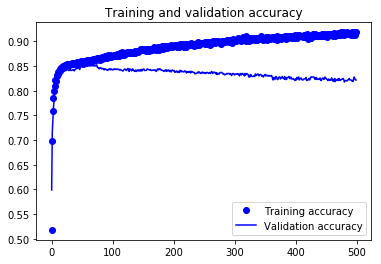

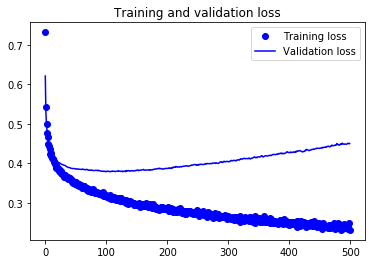

[[ 120  262]
 [ 184 1887]]
              precision    recall  f1-score   support

     Class 0       0.39      0.31      0.35       382
     Class 1       0.88      0.91      0.89      2071

    accuracy                           0.82      2453
   macro avg       0.64      0.61      0.62      2453
weighted avg       0.80      0.82      0.81      2453



In [0]:
# evaluation with over10

ep=500
bs=512
vb=0
vs=0.1

# === FIT THE MODEL ===
start_time=time.time()

history = model.fit(x_train, y_train, epochs=ep, batch_size=bs, verbose=vb, validation_split=vs)#, validation_data=(x_test,y_test)

elapsed_time = time.time() - start_time
t = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))
print('Elapsed time (learning):', t)


# === EVALUATION ===
score = model.evaluate(x_test, y_test, batch_size=bs, verbose=vb)

print('Test loss:', score[0])
print('Test accuracy:', score[1])


# === PLOT THE TRAINING ===
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


# === METRICS AND REPORT ===
from sklearn.metrics import classification_report, confusion_matrix

# get the predictions for the test data
y_pred = model.predict_classes(x_test)

# get the indices to be plotted
# correct = np.where(y_pred==y_test)[0]
# incorrect = np.where(y_pred!=y_test)[0]

target_names = ["Class {}".format(i) for i in range(2)]

print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test, y_pred, target_names=target_names))

That's for saving and loading the model

In [0]:
model.save(path+file_dataframe[8:-17]+'-RNN_model.h5')

In [0]:
from keras.models import load_model

model = load_model(path++file_dataframe[8:-17]+'-RNN_model.h5')
# make predictions
yhat = model.predict_classes(x_test, verbose=0)
print(yhat)

In [0]:
len(yhat)

# Test with a review

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
import re
import pandas as pd

def get_stop_words(stop_file_path):
  """load stop words """    
  with open(stop_file_path, 'r', encoding="utf-8") as f:
    stopwords = f.readlines()
    stop_set = set(m.strip() for m in stopwords)
  return frozenset(stop_set)

def compute_tfidf(doc,cv,tfidf_transformer,attributes):
  #generate tf-idf for the given document
  tf_idf_vector=tfidf_transformer.transform(cv.transform([doc])) 
  #sort the tf-idf vectors by descending order of scores
  sorted_items=sort_coo(tf_idf_vector.tocoo())
  #extract all items from document
  keywords=extract_topn_from_vector(feature_names,sorted_items,len(doc))
  dict_doc={}
  for e in attributes:
    if e in keywords:
      dict_doc[e]=keywords[e]
    else:
      dict_doc[e]=0
  return dict_doc

def sort_coo(coo_matrix):
  tuples = zip(coo_matrix.col, coo_matrix.data)
  return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
  """get the feature names and tf-idf score of top n items"""
  #use only topn items from vector
  sorted_items = sorted_items[:topn] 
  score_vals = []
  feature_vals = []
  # word index and corresponding tf-idf score
  for idx, score in sorted_items:
    #keep track of feature name and its corresponding score
    score_vals.append(round(score, 3))
    feature_vals.append(feature_names[idx])
  #create a tuples of feature,score
  #results = zip(feature_vals,score_vals)
  results= {}
  for idx in range(len(feature_vals)):
    results[feature_vals[idx]]=score_vals[idx]    
  return results

df=pd.read_csv(path+file_dataframe)

#load a set of stop words
stopwords=get_stop_words(path+'stopwords.txt')

#get the text column 
docs=df['text'].tolist()

#create a vocabulary of words, 
#ignore words that appear in 99,999999% of documents, 
#eliminate stop words
cv=CountVectorizer(stop_words=stopwords)
word_count_vector=cv.fit_transform(docs)

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['come', 'vis', 'viser', 'visest'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [0]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
porter_stemmer = PorterStemmer()
en_stops = set(stopwords.words('english'))

#binary search to improve efficency
def binary_search(e,l,inizio,fine):
  if inizio>fine or e<l[inizio] or e>l[fine-1]:
    return False
  else:
    mezzo=int((inizio+fine)/2)
    m=l[mezzo]
    if e==m:
      return True
    elif e>m:
      return binary_search(e,l,mezzo,fine)
    else:
      return binary_search(e,l,inizio,mezzo)

#removing symbols and adding space after them
def prepreprocess(frase):
  s=''
  syms=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','è','é','à','ò','ì','ù']
  for char in frase:
    if char not in syms:
      s+=' '
    else:
      s+=char
  return s

#preprocess using prepreprocess fase and stemming and removing stopwords
def preprocess(frase,en_words):
  l=[]
  for word in prepreprocess(frase.lower()).split(' '):
    w=word.lower()
    if w not in en_stops and len(w)>2 and binary_search(w,en_words,0,len(en_words)):
        l.append(porter_stemmer.stem(w))
  return repr(' '.join(l))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

DF=pd.read_csv(path+file_dataframe)

summary1='Great game of all the time!!!'
reviewText1="I've never played this game first, but since the initial install I've fallen in love <3 !!! It's amazing because shooting mode is very easy and level of entertainment is fantastic! I'll play for hour and hour so long!!! Very recommended!!!!"

summary2='hahah'
reviewText2="I like obama because he loves me so much and other people wanna play this game"

summary3=''
reviewText3="hi everyone, I'm so happy!"

en_words=sorted(open(path+'en_words.txt', 'r').read().lower().split('\n'))
doc1=preprocess(str(summary1+' '+reviewText1),en_words)
doc2=preprocess(str(summary2+' '+reviewText2),en_words)
doc3=preprocess(str(summary3+' '+reviewText3),en_words)

feature_names=cv.get_feature_names()

dict_doc1=compute_tfidf(doc1,cv,tfidf_transformer,list(DF.columns[2:]))
dict_doc2=compute_tfidf(doc2,cv,tfidf_transformer,list(DF.columns[2:]))
dict_doc3=compute_tfidf(doc3,cv,tfidf_transformer,list(DF.columns[2:]))

data_doc1=[]
for v in dict_doc1.values():
  data_doc1.append(float(v))
  
data_doc2=[]
for v in dict_doc2.values():
  data_doc2.append(float(v))
  
data_doc3=[]
for v in dict_doc3.values():
  data_doc3.append(float(v))
  
dc=[data_doc1, data_doc2, data_doc3]

In [0]:
from keras.models import load_model

model = load_model(path+file_dataframe[8:-17]+'-RNN_model.h5')
model.predict_classes(np.array(dc[0:len(dc)]), verbose=0)

array([1, 0, 0])

# Test with wine_data

In [0]:
import numpy as np 
import pandas as pd
from keras.models import Sequential 
from keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [0]:
model = Sequential() # istanza di Sequential 
model.add(Dense(10, input_dim=13, activation='relu',name='hidde1')) #strato di input + hidden 
model.add(Dropout(0.5) )
model.add(Dense(1, activation='tanh',name='outLayer')) #strato di output
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

In [0]:
wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)


np_wine_data = np.asarray(wine_data,dtype=np.float32)

for i in range(1,14):
  minx = np.min( np_wine_data[:,i] )
  maxx = np.max( np_wine_data[:,i])
  np_wine_data[:,i] = (np_wine_data[:,i]-minx)/(maxx-minx )
  
train, train_val = train_test_split(np_wine_data)

x_train = train[0:,1:]
y_train = train[0:,:1]-2

x_test = train_val[0:,1:]
y_test = train_val[0:,:1]-2 

#print(  np_wine_data[:,1]   )

In [0]:
model.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=500, batch_size=64,verbose=0)

In [0]:
model.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=20, batch_size=64,verbose=1)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred=model.predict(x_test)

# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))

y_pred